# Iris Data Analysis
In this notebook, I will perform data cleaning and exploratory data analysis(EDA) on the Iris Dataset. I will explore the relationship between variables and identify patterns and trends in the data.

The data will be obtained from the UCI Machine Learning Repository.

In [1]:
# Import libraries
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import libraries
from json import load
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=[c.replace(' (cm)', '').replace(' ', '_') for c in iris.feature_names])
iris_df['species_id'] = iris.target
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data Cleaning
The cleaning process will involve:
- Checking for missing values
- Checking for duplicates
- Checking for data types
- Check for outliers

In [2]:
# Check for missing values
print(iris_df.isnull().sum())

# Check for duplicates
print(iris_df.duplicated().sum())

# Check for data types
print(iris_df.dtypes)

# Rename columns to be more accessible
# iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Check for outliers using IQR
Q1 = iris_df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']].quantile(0.25)
Q3 = iris_df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']].quantile(0.75)
IQR = Q3 - Q1
mask_out = ~((iris_df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']] < (Q1 - 1.5 * IQR)) |
            (iris_df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']] > (Q3 + 1.5 * IQR))).any(axis=1)

X_full, y_full = iris_df[['sepal_length','sepal_width','petal_length','petal_width']], iris_df['species_id']
X_trim, y_trim = X_full[mask_out], y_full[mask_out]
outliers = ((iris_df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']] < (Q1 - 1.5 * IQR)) | (iris_df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']] > (Q3 + 1.5 * IQR)))
print("Outliers Detected:\n", outliers.sum())

# Show outlier rows
print("Outlier Rows:\n", iris_df[outliers.any(axis=1)])

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species_id      0
species         0
dtype: int64
1
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species_id        int64
species          object
dtype: object
Outliers Detected:
 petal_length    0
petal_width     0
sepal_length    0
sepal_width     4
dtype: int64
Outlier Rows:
     sepal_length  sepal_width  ...  species_id     species
15           5.7          4.4  ...           0      setosa
32           5.2          4.1  ...           0      setosa
33           5.5          4.2  ...           0      setosa
60           5.0          2.0  ...           1  versicolor

[4 rows x 6 columns]


In the Iris dataset, outliers may represent natural variation in flower morphology. They reflect class separation, not data errors. Therefore, we will retain them for analysis.

## Exploratory Data Analysis (EDA)
In this section, I will explore the dataset visually and statistically to understand the relationships between features and the distribution of different species.

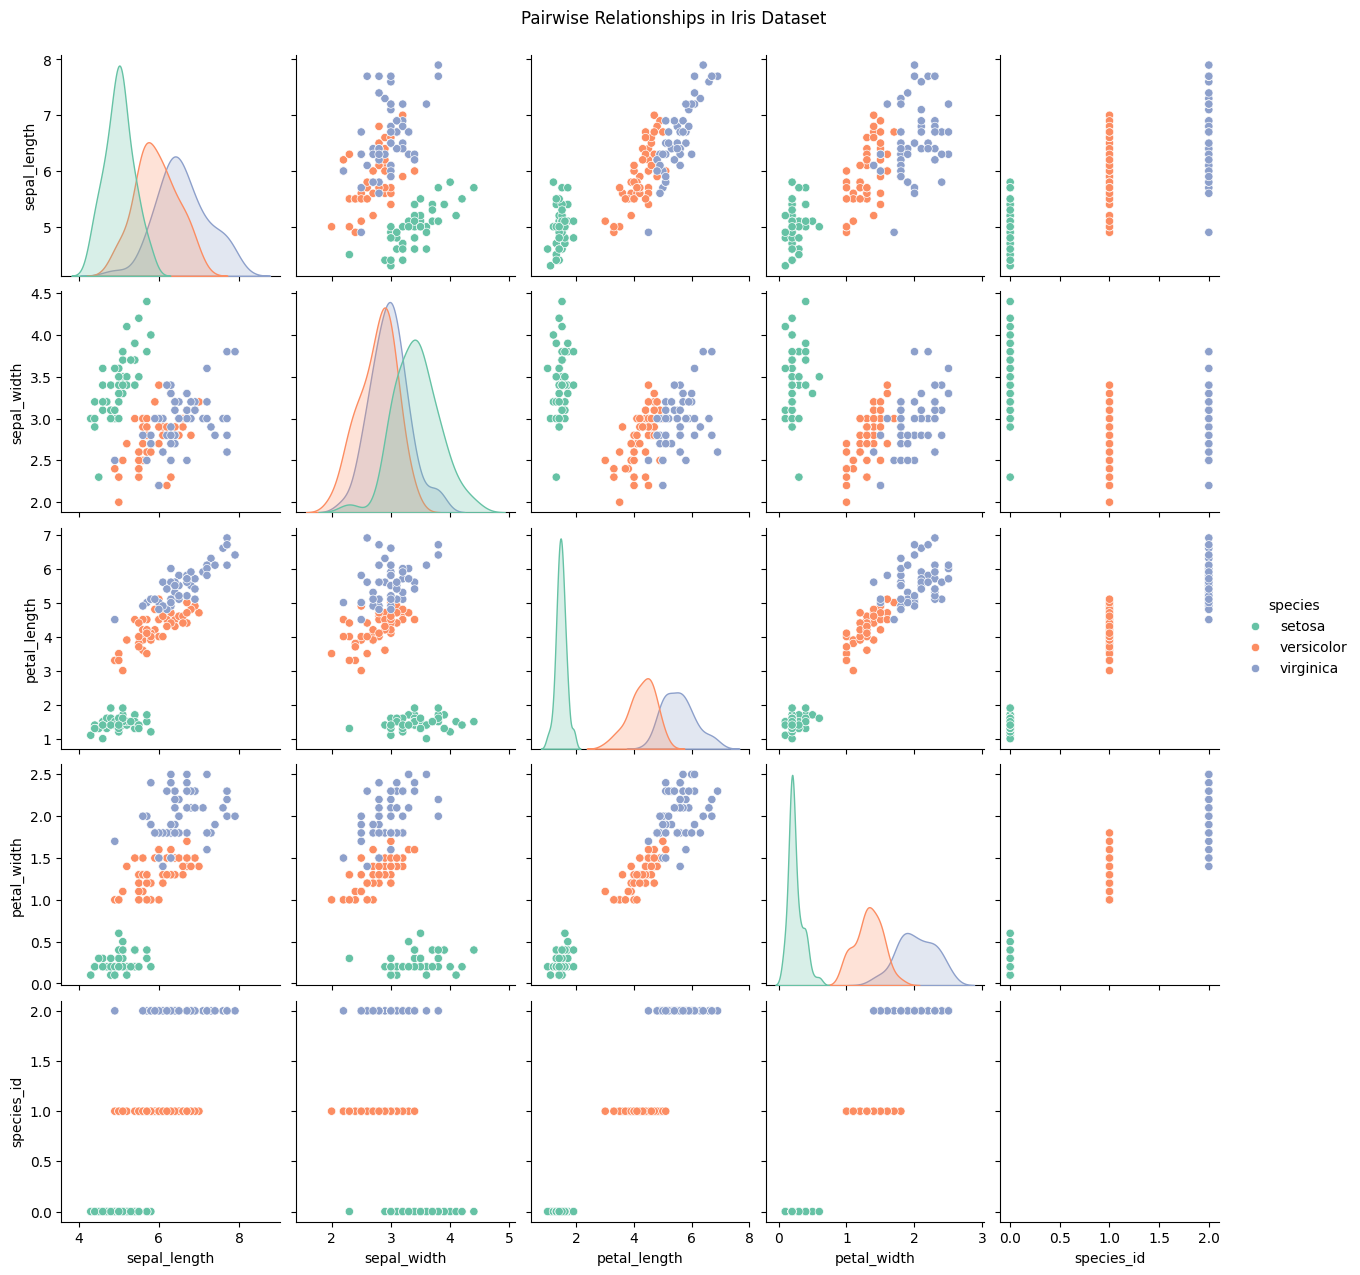

In [3]:
# Comparing the relationships between features
sns.pairplot(iris_df, hue="species", diag_kind="kde", palette="Set2")
plt.suptitle("Pairwise Relationships in Iris Dataset", y=1.02)
plt.show()

From the pairplot, we can conclude that:
- Sesota has the highest sepal length, Petal length, and petal width.
- Virginica has the largest sepal width.
- Petal length can be used to separate the classes effectively.

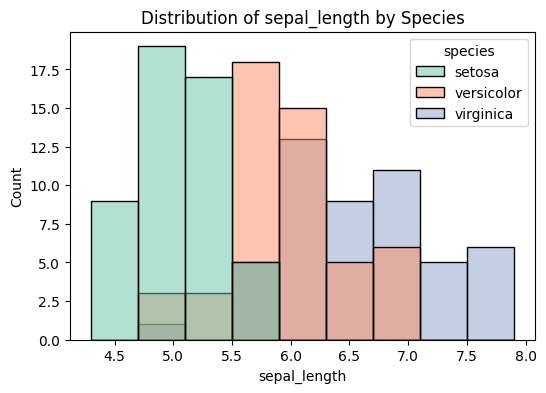

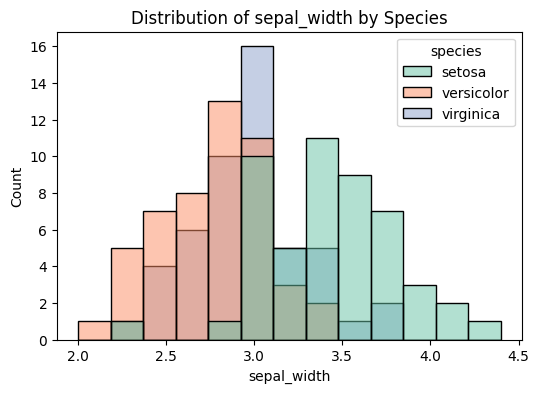

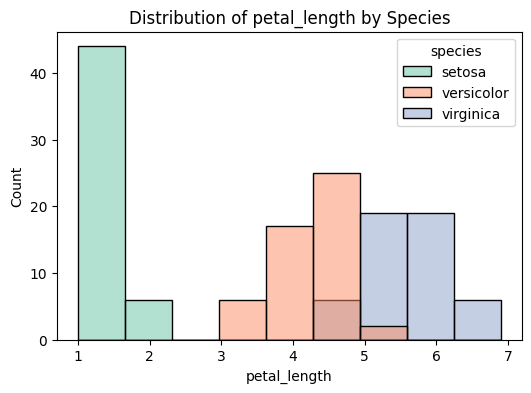

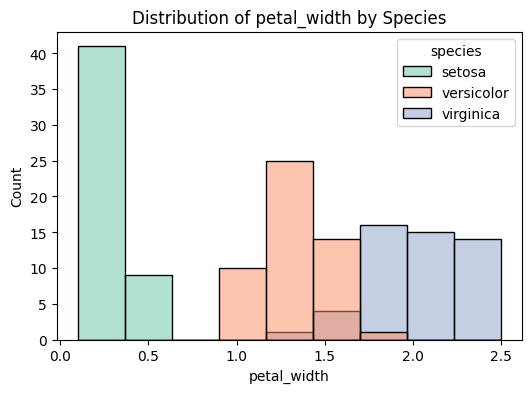

In [4]:
# Distribution plots
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=iris_df, x=col, hue="species", kde=False, palette="Set2")
    plt.title(f"Distribution of {col} by Species")
    plt.show()

This plot further illustrates the relationships between the features and the species classes, confirming our earlier observations.
- Petal length and petal width are key features for distinguishing between species since there is little overlap between the classes.

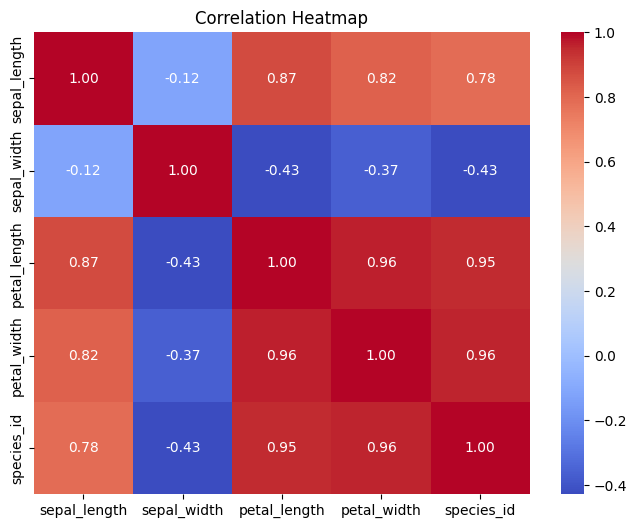

In [5]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr = iris_df.drop("species", axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

From the above visualization, we can conclude the following:
- Petal length & width are strongly correlated.
- Petal length & petal width clearly separate species.
- Setosa has the highest sepal length, petal length and petal width.
- Virginica has the highest sepal width.

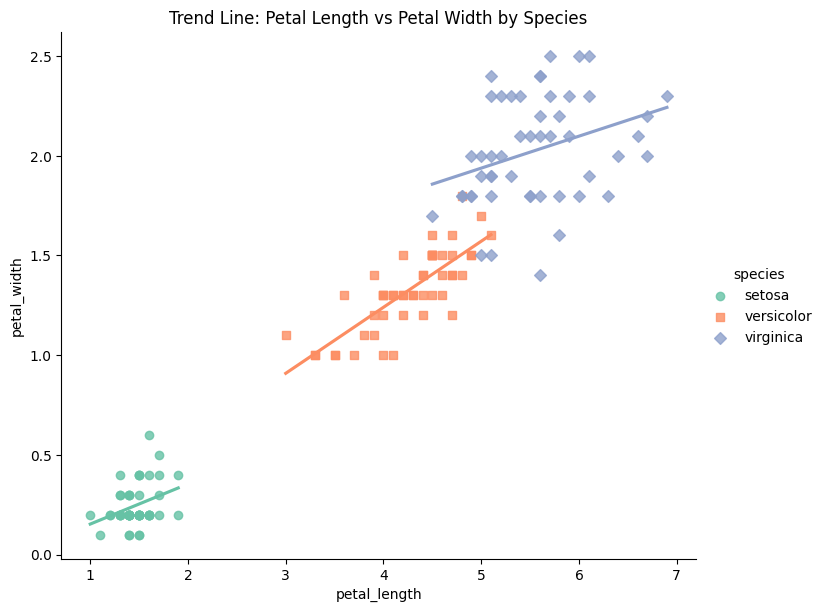

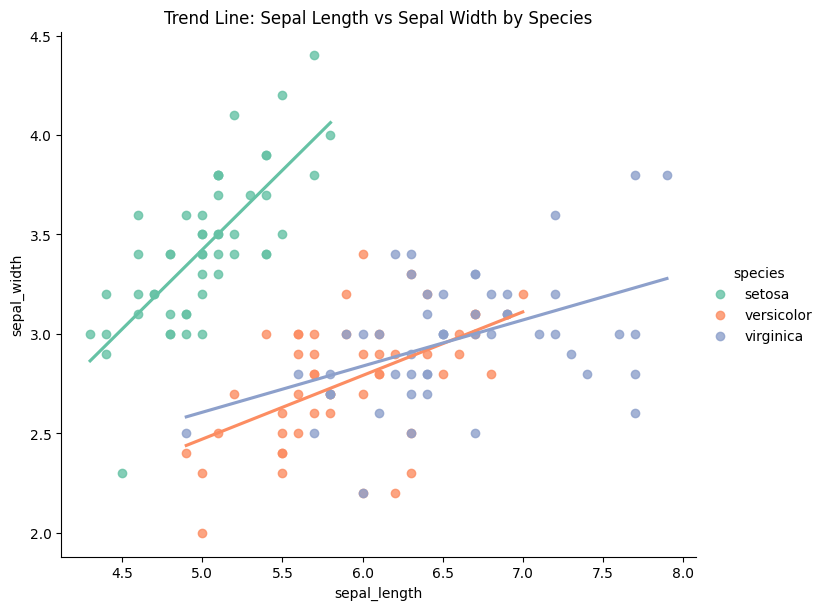

In [6]:
# Trend line between petal length and petal width
# type: ignore
sns.lmplot(
    data=iris_df, 
    x="petal_length", 
    y="petal_width", 
    hue="species", 
    height=6, 
    aspect=1.2, 
    palette="Set2",
    markers=["o", "s", "D"], 
    ci=None 
)
plt.title("Trend Line: Petal Length vs Petal Width by Species")
plt.show()

# Trend line between sepal length and sepal width
sns.lmplot(
    data=iris_df, 
    x="sepal_length", 
    y="sepal_width", 
    hue="species", 
    height=6, 
    aspect=1.2, 
    palette="Set2",
    ci=None
)
plt.title("Trend Line: Sepal Length vs Sepal Width by Species")
plt.show()


- Petal dimensions are the best features for separating species. You can draw lines between the groups with almost no overlap. 

- Sepal dimensions are not great features for classification. Versicolor and Virginica blur into each other, and even their trend lines nearly overlap. Only Setosa stands out clearly

## Predicting Species based on Features

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



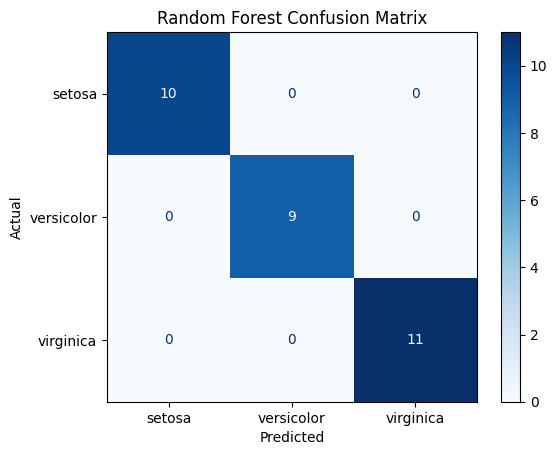

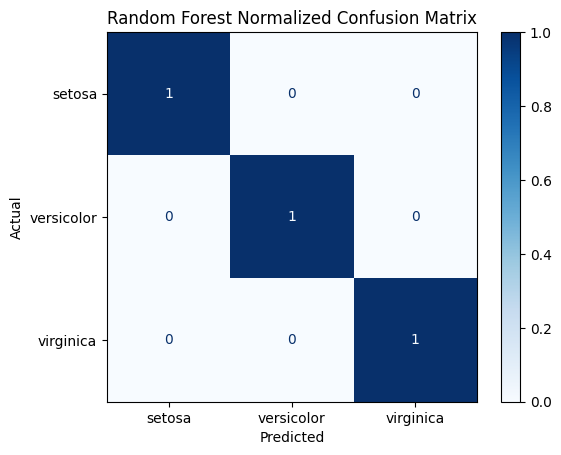

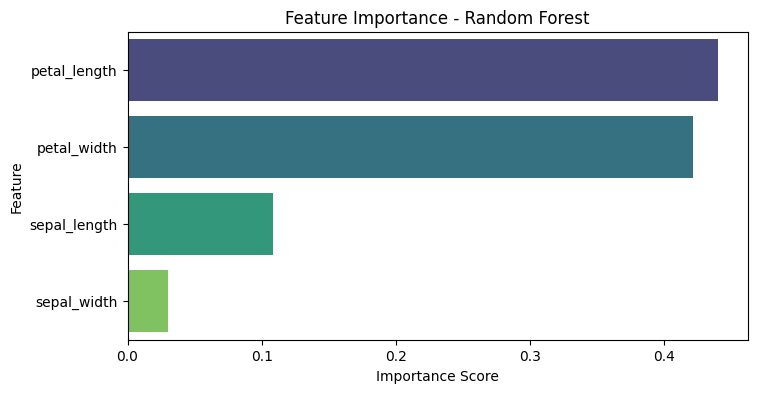

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from torch import normal

# Split the data into features and target
# type: ignore
X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris_df['species_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a log reg model with a pipeline for scaling
logreg = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, multi_class="auto", random_state=42))
])
logreg.fit(X_train, y_train)
target_names = iris_df['species'].unique()
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg.predict(X_test), target_names=target_names))

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=target_names, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=target_names, cmap="Blues", normalize="true")
plt.title("Random Forest Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# feature importance
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
feature_names = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

- Accuracy: 1.0 -> Both models classified all test samples correctly.
- Precision, Recall, F1 = 1.0 for all classes:
  - Precision = 1.0: When the model predicted a flower as "setosa" (or versicolor/virginica), it was always correct. No false positives.
  - Recall = 1.0: The model found all the flowers of each type. No false negatives.
  - F1 = 1.0: Perfect harmonic mean of precision & recall.


- All species were predicted correctly. Model never confuses Setosa/Versicolor/Virginica.
- Petal Length and Petal Width are the most important features for distinguishing between the species.

**Cross Validation**

In [8]:
# Cross validation
scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV accuracy:", scores.mean())

# Cross validation classification report
y_pred_cv = cross_val_predict(rf, X, y, cv=5)
print(classification_report(y, y_pred_cv))


Random Forest CV accuracy: 0.9666666666666668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



- Cross-validation (testing on different splits of the data), Random Forest consistently hit ~97% accuracy.
- The model was able to recognize all flower species with perfect precision and recall for setosa and an almost perfect score for versicolor and virginica.
- Out of 150 flowers, the model classifies ~145 correctly/97% accuracy.
- “Petal length and width are the most discriminative features.”
- “Setosa has the largest sepal width, while Virginica has the largest petal dimensions and the longest sepal length.”
- “On a stratified 20% hold-out, LR/RF achieved 100%; 5-fold CV mean ≈ 97% ± (std), which is the more realistic generalization estimate.”
- “I kept ‘outliers’ because they reflect real class structure.”

In [9]:
# type: ignore
# Train final model on full dataset 
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)

# Save model
joblib.dump(final_model, r"model/iris_random_forest.pkl")

['model/iris_random_forest.pkl']